In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models
import pickle as pickle
import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

Model feature 

In [2]:
model = models.load_model('./data/models/fire_noFire_Xception_Transfer_Learning.h5')

In [3]:
pickle_in = open("./data/pickle/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("./data/pickle/Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)



pickle_in = open("./data/pickle/X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("./data/pickle/Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")
print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

mean_rgb = np.mean(X_train, axis=(0,1,2))
print(mean_rgb)

X_train_norm = np.empty_like(X_train)
X_test_norm = np.empty_like(X_test)

for i in range(len(X_train)):
    for c in range(3):
        if(c==1):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[1]
        else:
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[2]
            
for i in range(len(X_test)):
    for c in range(3):
        if(c==1):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[1]
        else:
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[2]


X_train= (4608, 160, 160, 3) Y_train= (4608,)
X_test= (50, 160, 160, 3) Y_test= (50,)
[36.40889 36.40889 36.40889]


In [4]:

print(Y_train)
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

[1 1 1 ... 1 1 1]
2/2 [==============================] - 1s 253ms/step - loss: 0.1627 - binary_accuracy: 0.9600

Test Accuracy: 0.9599999785423279

Test Loss: 0.16266293823719025


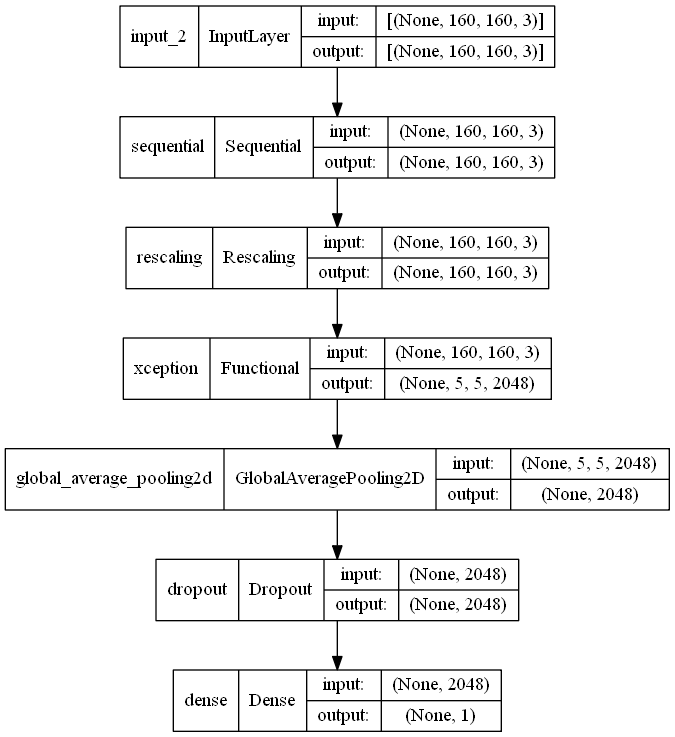

In [5]:
tf.keras.utils.plot_model(model, to_file="./Xception_model.png", show_shapes=True)